# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [24]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
# Run this cell without changes
df = pd.read_csv('data/case_study.csv', index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [26]:
df['PHYSHLTH'].isnull().sum()


0

Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [27]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

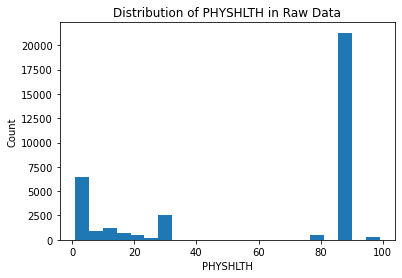

In [28]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df['PHYSHLTH'], bins="auto")
ax.set_xlabel('PHYSHLTH')
ax.set_ylabel('Count')
ax.set_title('Distribution of PHYSHLTH in Raw Data');

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [29]:
# Replace None with appropriate text
"""
The x axis is scaled for 100 days when it should only be the past 30 days
There is also a gap from 30 to 70. 
"""

'\nThe x axis is scaled for 100 days when it should only be the past 30 days\nThere is also a gap from 30 to 70. \n'

In [30]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [59]:
import PyPDF2

# Open the PDF file in read-binary mode
with open('data/data_dictionary.pdf', 'rb') as f:
    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(f)
    
    # Get the number of pages in the PDF document
    num_pages = len(pdf_reader.pages)
    
    # Iterate over each page in the PDF document
    for page_num in range(num_pages):
        # Get the page object
        page = pdf_reader.pages[page_num]
        
        # Extract the text content from the page
        text = page.extract_text()
        
        # Print the text content
        print(text)


Overwriting cache for 0 90456
Overwriting cache for 0 90456
Overwriting cache for 0 90456
Overwriting cache for 0 90456


 
 
 1 of 195    October 9, 2018  LLCP  2017  Codebook  Report  
Overall  version  data weighted  with _LLCPWT  
Behavioral  Risk Factor  Surveillance  System  
October  9, 2018  
      
   
 
LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 2 of 195    October 9, 2018  Label:  State  FIPS Code  
Section  Name:  Record  Identification  
Section  Number:  0 
Question  Number:  1 
Column:  1-2 
Type  of Variable:  Num  
SAS Variable  Name:  _STATE  
Question  Prologue:  
Question:   State  FIPS Code  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Alabama 6,754 1.50 1.48 
2 Alaska 3,203 0.71 0.22 
4 Arizona 15,499 3.44 2.12 
5 Arkansas  5,322 1.18 0.90 
6 California  9,358 2.08 11.95 
8 Colorado  9,802 2.18 1.72 
9 Connecticut  10,588 2.35 1.11 
10 Delaware  4,139 0.92 0.30 
11 District of Columbia  3,868 0.86 0.22 
12 Florida 22,059 4.90 6.61 
13 Georgia 6,056 1.35 3.11 
15 Hawaii 7,754 1.72 0.

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 9 of 195    October 9, 2018  Label:  Private  Residence?  
Section  Name:  Land  Line Introduction  
Section  Number:  0 
Question  Number:  2 
Column:  64 
Type  of Variable:  Num  
SAS Variable  Name:  PVTRESD1  
Question  Prologue:  Variable  only  on the land  line survey  
Question:  Is this a private residence ?   [READ ONLY IF NECESSARY: “By private residence, we mean someplace like a 
house or  apartment.”]  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes—Go to STATERE1  197,415 99.98 99.96 
2 No—Go to COLGHOUS  41 0.02 0.04 
BLANK Missing 
Notes: QSTVER >= 20  252,560 . . 
 
 
Label:  Do you live in college  housing?  
Section  Name:  Land  Line Introduction  
Section  Number:  0 
Question  Number:  3 
Column:  65 
Type  of Variable:  Num  
SAS Variable  Name:  COLGHOUS  
Question  Prologue:  Variable  only  on the land  line survey

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 15 of 195    October 9, 2018  Label:  Do you live in college  housing?  
Section  Name:  Cell Phone  Introduction  
Section  Number:  0 
Question  Number:  6 
Column:  80 
Type  of Variable:  Num  
SAS Variable  Name:  CCLGHOUS  
Question  Prologue:  Variable  only  on the cell phone  survey  
Question:   Do you live in college  housing?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes—Go to CSTATE1  1,183 100.00 100.00 
BLANK Missing 
Notes: QSTVER < 20; or PVTRESD3=1  448,833 . . 
 
 
Label:  Do you currently  live in  ____(state)____?  
Section  Name:  Cell Phone  Introduction  
Section  Number:  0 
Question  Number:  7 
Column:  81 
Type  of Variable:  Num  
SAS Variable  Name:  CSTATE1  
Question  Prologue:  Variable  only  on the cell phone  survey  
Question :  Do you currently  live in  ____(state)____?  
Value Value Label  Frequency

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 21 of 195    October 9, 2018  Label:  Ever  Told  Blood  Pressure  High  
Section  Name:  Hypertension  Awareness  
Core  Section  Number:  4 
Question  Number:  1 
Column:  101 
Type  of Variable:  Num  
SAS Variable  Name:  BPHIGH4  
Question  Prologue:  
Question:  Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure?  
(If ´Yes´ and respondent  is female,  ask ´Was  this only  when  you were  pregnant?´.)  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 181,098 40.24 32.44 
2 Yes, but female told only during pregnancy —Go to 
Section 05.01 CHOLCHK1  3,323 0.74 0.92 
3 No—Go to Section 05.01 CHOLCHK1  260,223 57.83 65.59 
4 Told borderline high or pre -hypertensive —Go to 
Section 05.01 CHOLCHK1  3,973 0.88 0.75 
7 Don´t know/Not Sure —Go to Section 05.01 CHOLCHK1  963 0.21 0.21 
9 Refu

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 28 of 195    October 9, 2018  Label:  Ever  told you had a depressive  disorder  
Section  Name:  Chronic  Health  Conditions  
Core  Section  Number:  6 
Question  Number:  10 
Column:  115 
Type  of Variable:  Num  
SAS Variable  Name:  ADDEPEV2  
Question  Prologue:  
Question:  (Ever told) you have a depressive disorder (including depression, major depression, dysthymia, or minor 
depression)?  
Value Value Label  Frequenc y Percentage  Weighted 
Percentage  
1 Yes 89,209 19.82 19.03 
2 No 358,683 79.71 80.50 
7 Don’t know/Not sure  1,661 0.37 0.39 
9 Refused 460 0.10 0.08 
BLANK Not asked or Missing  3 . . 
 
 
Label:  (Ever  told)  you have  kidney  disease?  
Section  Name:  Chronic  Health  Conditions  
Core  Section  Number:  6 
Question  Number:  11 
Column:  116 
Type  of Variable:  Num  
SAS Variable  Name:  CHCKIDNY  
Question  Prologue:  
Question:  (

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 34 of 195    October 9, 2018  Label:  Household  Telephones  
Section  Name:  Demographics  
Core  Section  Number:  8 
Question  Number:  11 
Column:  173 
Type  of Variable:  Num  
SAS Variable  Name:  NUMHHOL2  
Question  Prologue:  
Question:  Do you have more than one telephone number in your household?  Do not include cell phones or numbers 
that are  only  used  by a computer  or fax machine.  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 11,466 5.81 5.11 
2 No—Go to Section 08.13 CPDEMO1A  185,284 93.84 94.45 
7 Don’t know/Not sure —Go to Section 08.13 CPDEMO1A  176 0.09 0.10 
9 Refused—Go to Section 08.13 CPDEMO1A  527 0.27 0.33 
BLANK Not asked or Missing  
Notes: QSTVER >= 20  252,563 . . 
 
 
Label:  Residential  Phones  
Section  Name:  Demographics  
Core  Section  Number:  8 
Question  Number:  12 
Column:  174 
Type  of Var

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 41 of 195    October 9, 2018  Label:  Difficulty  Concentrating  or Remembering  
Section  Name:  Demographics  
Core  Section  Number:  8 
Question  Number:  24 
Column:  194 
Type  of Variable:  Num  
SAS Variable  Name:  DECIDE  
Question  Prologue:  
Question:  Because of a physical, mental, or emotional condition, do you have serious difficulty concentrat ing, 
remembering,  or making  decisions?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 46,069 10.55 11.31 
2 No 388,070 88.87 88.11 
7 Don’t know/Not Sure  1,981 0.45 0.40 
9 Refused 545 0.12 0.19 
BLANK Not asked or Missing  13,351 . . 
 
 
Label:  Difficulty  Walking  or Climbing  Stairs  
Section  Name:  Demographics  
Core  Section  Number:  8 
Question  Number:  25 
Column:  195 
Type  of Variable:  Num  
SAS Variable  Name:  DIFFWALK  
Question  Prologue:  
Question:   Do you

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 49 of 195    October 9, 2018  Label:  Most  drinks  on single  occasion  past  30 days  
Section  Name:  Alcohol  Consumption  
Core  Section  Number:  11 
Question  Number:  4 
Column:  213-214 
Type  of Variable:  Num  
SAS Variable  Name:  MAXDRNKS  
Question  Prologue:  
Question:   During  the past  30 days,  what  is the largest  number  of drinks  you had on any occasion?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 - 76 Number of drinks  212,836 96.89 96.35 
77 Don’t know/Not sure  5,797 2.64 3.18 
99 Refused 1,043 0.47 0.47 
BLANK Not asked or Missing  
Notes: Section 11.01, ALCDAY5, is coded 888, 
777, or 999;  230,340 . . 
 
 
Label:  How  many  times  did you eat fruit?  
Section  Name:  Fruits  & Vegetables  
Core  Section  Number:  12 
Question  Number:  1 
Column:  215-217 
Type  of Variable:  Num  
SAS Variable  Name:  FRUIT2

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 55 of 195    October 9, 2018  Label:  Type  of Physical  Activity  
Section  Name:  Exercise  (Physical  Activity)  
Core  Section  Number:  13 
Question  Number:  2 
Column:  234-235 
Type  of Variable:  Num  
SAS Variable  Name:  EXRACT11  
Question  Prologue:  
Question:   What  type  of physical  activity  or exercise  did you spend  the most  time  doing  during  the past  month?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
58 Swimming in laps  1,468 0.49 0.46 
59 Table tennis  49 0.02 0.02 
60 Tai Chi 345 0.11 0.08 
61 Tennis 1,160 0.39 0.39 
62 Touch football  66 0.02 0.05 
63 Volleyball  446 0.15 0.18 
64 Walking 161,054 53.57 48.89 
66 Waterskiing  97 0.03 0.03 
67 Weight lifting  12,927 4.30 5.98 
68 Wrestling  110 0.04 0.06 
69 Yoga 3,607 1.20 1.25 
71 Childcare  481 0.16 0.20 
72 Farm/Ranch Work (caring for livestock, stacking 
hay

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 61 of 195    October 9, 2018  Label:  How  many  times  did you do physical  activities  or exercises  to STRENGTHEN  your  muscles?  
Section  Name:  Exercise  (Physical  Activity)  
Core  Section  Number:  13 
Question  Number:  8 
Column:  250-252 
Type  of Variable:  Num  
SAS Variable  Name:  STRENGTH  
Question  Prologue:  
Question:  During the past month, how many times per week or per month did you do physical activities or exercises to 
STRENGTHEN your muscles ?   [Do NOT count aerobic activities like walking, running, or bicycling. Count activities using 
your own  body  weight  like yoga,  sit-ups or push -ups and those  using  weight  machines,  free weights,  or elastic  bands.]  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
101 - 199 Times per week  109,644 26.56 28.92 
201 - 299 Times per month  49,183 11.92 12.93 
777 Don’t know

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 68 of 195    October 9, 2018  Label:  How  Often  Check  Feet  for Sores  or Irritations  
Section  Name:  Diabetes  
Module  Section  Number:  2 
Question  Number:  3 
Column:  296-298 
Type  of Variable:  Num  
SAS Variable  Name:  FEETCHK2  
Question  Prologue:  
Question:  About how often do you check your feet for any sores or irritations?  Include times when checked by a  family 
member  or friend,  but do NOT  include  times  when  checked  by a health  professional.  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
101 - 199 Times per day  
Notes: 1 _ _ Times per day  21,826 57.05 55.40 
201 - 299 Times per week  
Notes: 2 _ _ Times per week  6,438 16.83 15.53 
301 - 399 Times per month  
Notes: 3 _ _ Times per month  2,187 5.72 5.76 
401 - 499 Times per year  
Notes: 4 _ _ Times per year  650 1.70 1.64 
555 No feet 218 0.57 0.73 
777 Don’t

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 75 of 195    October 9, 2018  Label:  Outpatient  rehab  after  heart  attack  hosp  stay 
Section  Name:  Cardiovascular  Health  
Module  Section  Number:  4 
Question  Number:  1 
Column:  314 
Type  of Variable:  Num  
SAS Variable  Name:  HAREHAB1  
Question  Prologue:  
Question:  Following your hear t attack, did you go to any kind of outpatient rehabilitation? This is sometimes called 
“rehab.”  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 959 43.97 40.98 
2 No 1,171 53.69 56.90 
7 Don’t know/Not Sure  39 1.79 1.86 
9 Refused 12 0.55 0.27 
BLANK Not asked or Missing  
Notes: Section 06.01, CVDINFR4, is coded 2, 7, 
9 or Missing  447,835 . . 
 
 
Label:  Outpatient  rehab  after  hosp  stay for stroke  
Section  Name:  Cardiovascular  Health  
Module  Section  Number:  4 
Question  Number:  2 
Column:  315 
Type  of Variable:  Num 

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 81 of 195    October 9, 2018  Label:  Hlth  care  pro ever  advised  using  less salt to reduce  BP 
Section  Name:  Actions  to Control  High  Blood  Pressure  
Module  Section  Number:  5 
Question  Number:  6 
Column:  326 
Type  of Variable:  Num  
SAS Variable  Name:  BPSLTADV  
Question Prologue: [Has a doctor or other health professional ever advised you to do any of the following to help lower or 
control  your  high  blood  pressure?]  
Question:   (Ever  advised  you to) cut down  on salt (to help  lower  or control  your  high  blood  pressure)?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 5,929 65.20 64.60 
2 No 2,657 29.22 30.68 
3 Do not use salt  422 4.64 3.82 
7 Don’t know/Not Sure  72 0.79 0.69 
9 Refused 14 0.15 0.20 
BLANK Not asked or Missing  
Notes: Section 04.01, BPHIGH4, is coded 2, 3, 4, 
7, 9, or Missing  440,92

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 87 of 195    October 9, 2018  Label:  Urgent  Asthma  Treatment  During  Past  12 Months  
Section  Name:  Adult  Asthma  History  
Module  Section  Number:  7 
Question  Number:  4 
Column:  340-341 
Type  of Variable:  Num  
SAS Variable  Name:  ASDRVIST  
Question  Prologue:  [If one or more  visits  to Q3, fill in  “Besides  those  emergency  room  or urgent  care  center  visits,”]  
Question:  During the past 12 months, how many times did you see a doctor, nurse or other hea lth professional for urgent 
treatment  of worsening  asthma  symptoms?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 - 87 Number of visits [87 = 87 or more]  
Notes: 87=87 or more  136 44.16 43.58 
88 None 167 54.22 54.39 
98 Don’t know/Not sure  5 1.62 2.04 
BLANK Not asked or Missing  
Notes: Section 06.04, ASTHMA3, is coded 2, 7, 9, 
or Missing; or Section 06.05

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 94 of 195    October 9, 2018  Label:  How  Much  Time  Do You Sleep  
Section  Name:  Sleep  Disorder  
Module  Section  Number:  9 
Question  Number:  1 
Column:  359-360 
Type  of Variable:  Num  
SAS Variable  Name:  SLEPTIM1  
Question  Prologue:  
Question:   On average,  how  many  hours  of sleep  do you get in a 24-hour  period?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 - 24 Number of hours [1 -24] 49,365 98.79 98.70 
77 Don’t know/Not Sure  546 1.09 1.18 
99 Refused 58 0.12 0.11 
BLANK Missing 400,047 . . 
 
 
Label:  Days  had trouble  with  sleep  
Section  Name:  Sleep  Disorder  
Module  Section  Number:  9 
Question  Number:  2 
Column:  361-362 
Type  of Variable:  Num  
SAS Variable  Name:  ADSLEEP  
Question  Prologue:  
Question:  Over the last 2 weeks, how many days have you h ad trouble falling asleep or staying asleep

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 100 of 195    October 9, 2018  Label:  Doctor  Visits  Past  12 Months  
Section  Name:  Health  Care  Access  
Module  Section  Number:  10 
Question  Number:  5 
Column:  398-399 
Type  of Variable:  Num  
SAS Variable  Name:  DRVISITS  
Question  Prologue:  
Question:   How  many  times  have  you been  to a doctor,  nurse,  or other  health  professional  in the past  12 months?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 - 76 Number of times  39,036 86.22 84.13 
88 None 4,520 9.98 12.62 
77 Don’t know/Not Sure  1,717 3.79 3.25 
BLANK Not asked or Missing  404,743 . . 
 
 
Label:  Could  Not Get Medicine  Due To Cost  
Section  Name:  Health  Care  Access  
Module  Section  Number:  10 
Question  Number:  6 
Column:  400 
Type  of Variable:  Num  
SAS Variable  Name:  MEDSCOS1  
Question  Prologue:  
Question:  Not including over -the-c

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 107 of 195    October 9, 2018  Label:  Type  of Cancer  
Section  Name:  Cancer  Survivorship  
Module  Section  Number:  12 
Question  Number:  3 
Column:  411-412 
Type  of Variable:  Num  
SAS Variable  Name:  CNCRTYP1  
Question  Prologue:  
Question:  What type of cancer was it?  (If Response = 2 (Two) or 3 (Three or more), ask: “With your most recent 
diagnoses of  cancer,  what  type  of cancer  was it?”)  
Value Value La bel Frequency  Percentage  Weighted 
Percentage  
30 Other 489 6.13 6.76 
77 Don’t know/Not Sure  330 4.14 3.98 
99 Refused 27 0.34 0.45 
BLANK Missing 
Notes: Section 06.06, CHCSCNCR, is code d 2, 7, 
9 or Missing and Section 06.07, CHCOCNCR, is 
coded 2, 7, 9 or Missing  ; or Module 13.01, 
CNCRDIFF, is coded 7, 9 or missing  442,040 . . 
 
 
Label:  Currently  Receiving  Treatment  for Cancer  
Section  Name:  Cancer  Survivorship  
Modu

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 112 of 195    October 9, 2018  Label:  Currently  Have  Physical  Pain  From  Cancer  Or Treatment?  
Section  Name:  Cancer  Survivorship  
Module  Section  Number:  12 
Question  Number:  12 
Column:  422 
Type  of Variable:  Num  
SAS Variable  Name:  CSRVPAIN  
Question  Prologue:  
Question:   Do you currently  have  physical  pain  caused  by your  cancer  or cancer  treatment?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 385 7.91 9.06 
2 No—Go to next module  4,468 91.78 90.71 
7 Don’t know/Not Sure —Go to next module  15 0.31 0.23 
BLANK Not asked or Missing  
Notes: Section 06.06, CHCSCNCR, is co ded 2, 7, 
9 or Missing and Section 06.07, CHCOCNCR, is 
coded 2, 7, 9 or Missing  ; or Module 13.01, 
CNCRDIFF, is coded 7, 9 or Missing; or Module 
13.04, CSRVTRT2, is coded 1, 3, 4, 7, 9 or 
Missing;  445,148 . . 
 
 
Label:  Is Pain

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 117 of 195    October 9, 2018  Label:  Did you do anything  to keep  from  getting  pregnant?  
Section  Name:  Preconception  Health/Family  Planning  
Module  Section  Number:  16 
Question  Number:  1 
Column:  436 
Type  of Variable:  Num  
SAS Variable  Name:  PFPPRVN2  
Question  Prologue:  
Question:   Did you or your  partner  do anything  the last time  you had sex to keep  you from  getting  pregnant?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 20,838 45.50 46.90 
2 No—Go to Module 16.3 NOBCUSE6  17,043 37.22 34.74 
3 No partner/not sexually active —Go to next module  4,168 9.10 10.55 
4 Same sex partner —Go to next module  507 1.11 1.35 
5 Has had a Hysterectomy —Go to next module  2,233 4.88 3.75 
7 Don’t know / Not sure —Go to Module 16.3 NOBCUSE6  173 0.38 0.43 
9 Refused—Go to Module 16.3 NOBCUSE6  834 1.82 2.26 
BLANK No

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 124 of 195    October 9, 2018  Label:  How  old when  you last smoked?  
Section  Name:  Lung  Cancer  Screening  
Module  Section  Number:  20 
Question  Number:  2 
Column:  450-452 
Type  of Variable:  Num  
SAS Variable  Name:  LCSLAST  
Question  Prologue:  
Question:   How  old were  you when  you last smoked  cigarettes  regularly?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 - 100 Age in Years  22,778 95.07 94.55 
777 Don’t know/Not Sure  1,023 4.27 4.51 
999 Refused 157 0.66 0.94 
BLANK Not asked or Missing  
Notes: Section 09.01, SMOKE100, is coded 2, 7, 
9, or Missing; or Section 09.02, SMOKDAY2, is 
coded 7, 9, or Missing; or Module 20.01, 
LCSFIRST, is coded 888 or missing  426,058 . . 
 
 
Label:  On average,  how  many  cigarettes  do you smoke  each  day?  
Section  Name:  Lung  Cancer  Screening  
Module  Section  Number:  2

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 130 of 195    October 9, 2018  Label:  Which  support  do you MOST  need  that you are not getting?  
Section  Name:  Caregiving  
Module  Section  Number:  21 
Question  Number:  8 
Column:  466 
Type  of Variable:  Num  
SAS Variable  Name:  CRGVMST2  
Question  Prologue:  
Question:   Of the following  support  services,  which  one do you MOST  need,  that you are not currently  getting?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Classes about giving care, such as giving 
medications  83 1.70 2.08 
2 Help in getting access to services  423 8.68 7.18 
3 Support groups  112 2.30 2.23 
4 Individual counseling to help cope with giving 
care 134 2.75 2.99 
5 Respite care  174 3.57 3.46 
6 You don’t need any of these support services  3,835 78.68 79.35 
7 Don’t know/Not Sure  72 1.48 1.91 
9 Refused 41 0.84 0.81 
BLANK Not asked or Missing  

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 135 of 195    October 9, 2018  Label:  Were  you not able  to pay your  bills?  
Section  Name:  Social  Determinants  of Health  
Module  Section  Number:  24 
Question  Number:  1 
Column:  476 
Type  of Variable:  Num  
SAS Variable  Name:  SDHBILLS  
Question  Prologue:  
Question:   During  the last 12 months,  was there  a time  when  you were  not able  to pay your  mortgage,  rent  or utility  bills?  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Yes 7,099 8.04 9.28 
2 No 80,783 91.54 90.18 
7 Don’t know/Not Sure  156 0.18 0.27 
9 Refused 211 0.24 0.27 
BLANK Not asked or Missing  361,767 . . 
 
 
Label:  How  many  times  have  you moved?  
Section  Name:  Social  Determinants  of Health  
Module  Section  Number:  24 
Question  Number:  2 
Column:  477-478 
Type  of Variable:  Num  
SAS Variable  Name:  SDHMOVE  
Question  Prologue: 

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 141 of 195    October 9, 2018  Label:  Gender  of child  
Section  Name:  Random  Child  Selection  
Module  Section  Number:  28 
Question  Number:  2 
Column:  695 
Type  of Variable:  Num  
SAS Variable  Name:  RCSGENDR  
Question  Prologue:  
Question:   Is the child  a boy or a girl?  
Value Value Labe l Frequency  Percentage  Weighted 
Percentage  
1 Boy 29,623 50.15 49.90 
2 Girl 26,927 45.58 45.07 
9 Refused 2,521 4.27 5.03 
BLANK Not asked or Missing  
Notes: Section 08.16, CHILDREN, is coded 0, 88, 
99, or Missing; or CHILDAGE > 215 months  390,945 . . 
 
 
Label:  Relationship  to child  
Section  Name:  Random  Child  Selection  
Module  Section  Number:  28 
Question  Number:  6 
Column:  730 
Type  of Variable:  Num  
SAS Variable  Name:  RCSRLTN2  
Question  Prologue:  
Question:   How  are you related  to the child?  
Value Value Label  Frequency  P

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 147 of 195    October 9, 2018  Label:  Child  Hispanic,  Latino/a,  or Spanish  origin  calculated  variable  
Section  Name:  Child  Demographic  Variables  
Module  Section  Number:  1 
Question  Number:  01 
Column:  1530  
Type  of Variable:  Num  
SAS Variable  Name:  _CHISPNC  
Question  Prologue:  
Question:   Child  Hispanic,  Latino/a,  or Spanish  origin  calculated  variable  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Child of Hispanic, Latino/a, or Spanish origin  9,595 3.06 5.88 
2 Child not of Hispanic, Latino/a, or Spanish 
origin 49,617 15.80 17.46 
9 Don’t know/Not Sure/Refused/Missing  254,848 81.15 76.67 
BLANK Not asked or Missing  135,956 . . 
 
 
Label:  Child  Non-Hispanic  Race  including  Multiracial  
Section  Name:  Child  Demographic  Variables  
Module  Section  Number:  1 
Question  Number:  04 
Column:  1587 -

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 153 of 195    October 9, 2018  Label:  Cholesterol  Checked  Calculated  Variable  
Section  Name:  Calculated  Variables  
Module  Section  Number:  5 
Question  Number:  1 
Column:  1951  
Type  of Variable:  Num  
SAS Variable  Name:  _CHOLCH1  
Question  Prologue:  
Question:   Cholesterol  check  within  past  five years  
Value Value Label  Frequency  Percentage  Weighted 
Percenta ge 
1 Had cholesterol checked in past 5 years  
Notes: CHOLCHK1 = 2 or 3 or 4  385,197 85.60 81.49 
2 Did not have cholesterol checked in past 5 years  
Notes: CHOLCHK1 = 5  16,572 3.68 4.04 
3 Have never had cholesterol checked  
Notes: CHOLCHK1 = 1  26,495 5.89 8.27 
9 Don’t know/Not Sure Or Refused/Missing  
Notes: CHOLCHK1 = 7 or 9 or Missing  21,752 4.83 6.20 
 
 
Label:  High  Cholesterol  Calculated  Variable  
Section  Name:  Calculated  Variables  
Module  Section  Number:

 
LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 159 of 195    October 9, 2018  Label:  Calculated  non-Hispanic  Race  including  multiracial  
Section  Name:  Calculated  Race  Variables  
Module  Section  Number:  8 
Question  Number:  4 
Column:  2019 -2020  
Type  of Variable:  Num  
SAS Variable  Name:  _MRACE1  
Question  Prologue:  
Question:   Calculated  multiracial  race  categorization  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 White only  
Notes: MRACASC1 = 10  359,262 79.83 71.33 
2 Black or African American only  
Notes: MRACASC1 = 20  37,655 8.37 12.39 
3 American Indian or Alaskan Native only  
Notes: MRACASC1 = 30  9,823 2.18 1.61 
4 Asian Only  
Notes: MRACASC1 = 40,41,42,43,44,45,46,47  10,166 2.26 5.48 
5 Native Hawaiian or other Pacific Islander only  
Notes: MRACASC1 = 50,51,52,53,54  1,916 0.43 0.35 
6 Other race only  
Notes: MRACASC1 = 60  9,760 2.17 3.47 
7 M

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 165 of 195    October 9, 2018  Label:  Imputed  age in six groups  
Section  Name:  Calculated  Variables  
Module  Section  Number:  8 
Question  Number:  14 
Column:  2033  
Type  of Variable:  Num  
SAS Variable  Name:  _AGE_G  
Question  Prologue:  
Question:   Six-level  imputed  age category  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Age 18 to 24  
Notes: 18 <= _IMPAGE <= 24  26,236 5.83 12.53 
2 Age 25 to 34  
Notes: 25 <= _IMPAGE <= 34  47,232 10.50 17.35 
3 Age 35 to 44  
Notes: 35 <= _IMPAGE <= 44  52,100 11.58 16.30 
4 Age 45 to 54  
Notes: 45 <= _IMPAGE <= 54  69,902 15.53 16.64 
5 Age 55 to 64  
Notes: 55 <= _IMPAGE <= 64  96,577 21.46 16.68 
6 Age 65 or older  
Notes: _IMPAGE => 65  157,969 35.10 20.50 
 
 
Label:  Computed  Height  in Inches  
Section  Name:  Calculated  Variables  
Module  Section  Number:  8 
Question  Num

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 171 of 195    October 9, 2018  Label:  Computed  E-cigarette  User  Status  
Section  Name:  Calculated  Variables  
Module  Section  Number:  10 
Question  Number:  1 
Column:  2056  
Type  of Variable:  Num  
SAS Variable  Name:  _ECIGSTS  
Question  Prologue:  
Question:  Four -level e -cigarette smoker status:  Everyday e -cigarette user, Someday e -cigarette user, Former e -cigaret te 
user,  Non -e-cigarette  user  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
1 Current E -cigarette user - uses every day  5,019 1.12 1.43 
2 Current E -cigarette user - uses some days  8,658 1.92 2.71 
3 Former E -cigarette user  52,954 11.77 15.04 
4 Never used E -cigarettes  362,739 80.61 75.08 
9 Don’t know/Refused/Missing  20,646 4.59 5.74 
 
 
Label:  Current  E-cigarette  User  Calculated  Variable  
Section  Name:  Calculated  Variables  
Module  Sect

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 177 of 195    October 9, 2018  Label:  The number  of missing  vegetable  responses  
Section  Name:  Calculated  Variables  
Module  Section  Number:  12 
Question  Number:  8 
Column:  2094  
Type  of Variable:  Num  
SAS Variable  Name:  _MISVEG1  
Question  Prologue:  
Question:   The number  of missing  vegetable  responses  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
0 No missing vegetable responses  407,176 90.48 89.01 
1 - 4 Has 1, 2, 3, or 4 missing vegetable responses  42,840 9.52 10.99 
 
 
Label:  Missing  any fruit  responses  
Section  Name:  Calculated  Variables  
Module  Section  Number:  12 
Question  Number:  9 
Column:  2095  
Type  of Variable:  Num  
SAS Variable  Name:  _FRTRES1  
Question  Prologue:  
Question:   Missing  any fruit  responses  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
0 Not Inclu

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 183 of 195    October 9, 2018  Label:  Estimated  Activity  Intensity  for First  Activity  
Section  Name:  Calculated  Variables  
Module  Section  Number:  13 
Question  Number:  6 
Column:  2132  
Type  of Variable:  Num  
SAS Variable  Name:  ACTIN11_  
Question  Prologue:  
Question:   Estimated  Activity  Intensity  for First Activity  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
0 Not Moderate or Vigorous or No Activity  17,413 5.89 7.58 
1 Moderate  182,262 61.62 68.39 
2 Vigorous  96,112 32.49 24.03 
BLANK Not asked or Missing  154,229 . . 
 
 
Label:  Estimated  Activity  Intensity  for Second  Activity  
Section  Name:  Calculated  Variables  
Module  Section  Number:  13 
Question  Number:  7 
Column:  2133  
Type  of Variable:  Num  
SAS Variable  Name:  ACTIN21_  
Question  Prologue:  
Question:   Estimated  Activity  Intensity  

LLCP 2017 Codebook Report  
Overall version data weighted with _LLCPWT  
Behavioral Risk Factor Surveillance System  
 
 
 189 of 195    October 9, 2018  Label:  Minutes  of total  Vigorous  Physical  Activity  per week  
Section  Name:  Calculated  Variables  
Module  Section  Number:  13 
Question  Number:  21 
Column:  2191 -2195  
Type  of Variable:  Num  
SAS Variable  Name:  PA1VIGM_  
Question  Prologue:  
Question:   Minutes  of total  Vigorous  Physical  Activity  per week  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  
0 - 99999 Minutes of Activity per week  294,863 100.00 100.00 
BLANK Not asked or Missing  155,153 . . 
 
 
Label:  Physical  Activity  Categories  
Section  Name:  Calculated  Variables  
Module  Section  Number:  13 
Question  Number:  22 
Column:  2196  
Type  of Variable:  Num  
SAS Variable  Name:  _PACAT1  
Question  Prologue:  
Question:   Physical  Activity  Categories  
Value Value Label  Frequency  Percentage  Weighted 
Percentage  

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [32]:
# Your code here

#df['PHYSHLTH'].loc[df['PHYSHLTH'] == 88] = 0
drop = [77, 99, ''] # replaces any value of 88 in the 'PHYSHLTH' column with 0
df.drop(df.loc[df['PHYSHLTH'] == 77].index, inplace= True) # remove any rows ontaining  77 or 99, or an empty string
df.drop(df.loc[df['PHYSHLTH'] == 99].index, inplace= True)
df['PHYSHLTH'].replace(88, 0, inplace= True) #replaces any remaining value of 88 in the 'PHYSHLTH' column with 0


Run the code below to ensure you have the correct, cleaned dataframe:

In [33]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [34]:
# Run this cell without changes
df["PHYSHLTH"].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

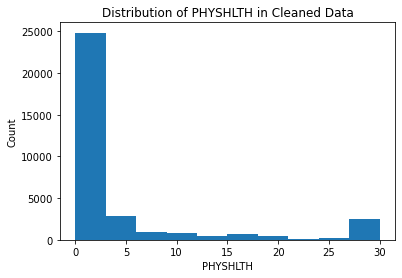

In [35]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [36]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [43]:
# Your code here
df["_STATE"].replace([9.0, 34, 36], ['Connecticut', 'New Jersey', 'New York'], inplace=True)

Below, we check the values:

In [44]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

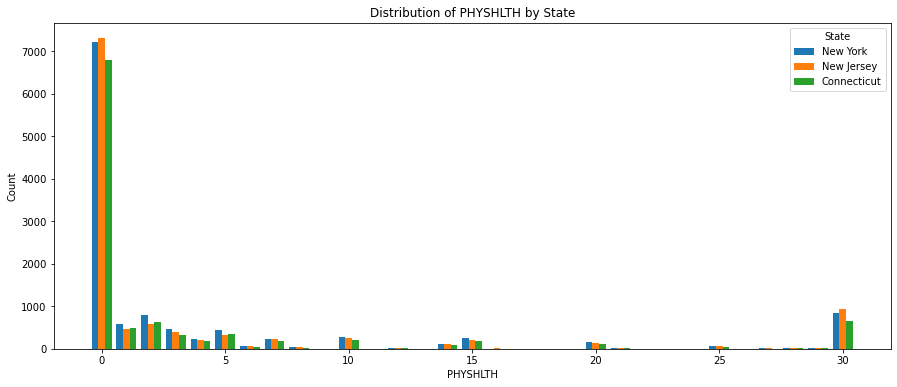

In [45]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [46]:
# Replace None with appropriate text
"""
There are small difference with each state but arent drastically different from one another
"""

'\nThere are small difference with each state but arent drastically different from one another\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [47]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [48]:
# Replace None with appropriate text
"""
Since we are dealing with multiple samples, I believe Anova test would be the best choice
We will be comparing the variance of the dataset based on their state.
"""

'\nSince we are dealing with multiple samples, I believe Anova test would be the best choice\nWe will be comparing the variance of the dataset based on their state.\n'

Now, identify the null and alternative hypotheses:

In [49]:
# Replace None with appropriate text
"""
H0: The mean number of day does not differ between states
HA: The mean number of days differ between states
"""

'\nH0: The mean number of day does not differ between states\nHA: The mean number of days differ between states\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [50]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [53]:
# Replace None with appropriate text
"""
The p-value 0.0000000088 is less than alpha of 0.05, therefore we reject the null hypothesis.
This means that there is significant differences in the mean "PHYSHLTH" values across the different states.. 

I would recommend that the business investigate the reasons behind 
the differences in "PHYSHLTH" values across the different states.
This could involve looking at factors such as differences in healthcare access, lifestyle choices, 
or environmental factors
"""

'\nThe p-value 0.0000000088 is less than alpha of 0.05, therefore we reject the null hypothesis.\nThis means that there is significant differences in the mean "PHYSHLTH" values across the different states.. \n\nI would recommend that the business investigate the reasons behind \nthe differences in "PHYSHLTH" values across the different states.\nThis could involve looking at factors such as differences in healthcare access, lifestyle choices, \nor environmental factors\n'

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [54]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [60]:
# Your code here

df = df[df['RENTHOM1'] <= 2].copy()
df['RENTHOM1'].replace([1,2], ['Own', 'Rent'], inplace= True)

In [61]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [62]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

Text(0, 0.5, 'Proababilty')

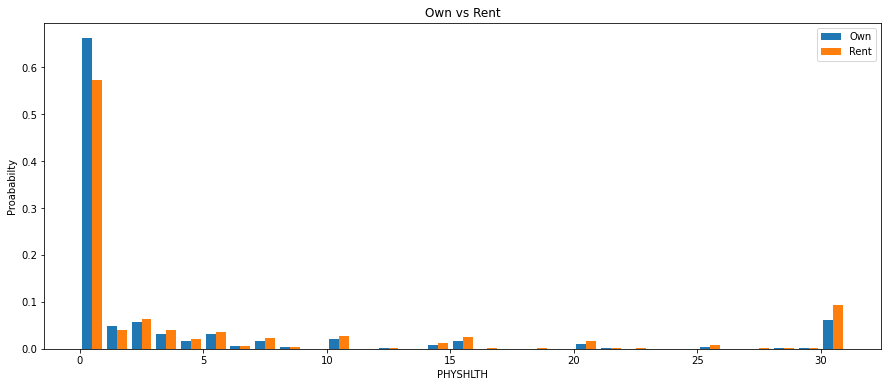

In [67]:
# Your code here

own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]


fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[own, rent],
    density= True, bins=range(32),
    label = ["Own", "Rent"]
);
ax.set_title("Own vs Rent")
ax.legend()
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Proababilty")


Then run this code to find the averages:

In [68]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [69]:
# Replace None with appropriate text
"""
If you rent a house, you are more likely to have bad days compared to having own a house.
It consistently have higher number of days to almost every category. 
"""

'\nIf you rent a house, you are more likely to have bad days compared to having own a house.\nIt consistently have higher number of days to almost every category. \n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [72]:
# Your code here (create additional cells as needed)
"""
The t test should be the best since it is comparing two data sets

H0: There is no difference if an individual own or rent a house 
HA: There is a difference if an individual own or rent a house

"""

'\nThe t test should be the best since it is comparing two data sets\n\nH0: There is no difference if an individual own or rent a house \nHA: There is a difference if an individual own or rent a house\n\n'

In [73]:
import scipy.stats as stats
    
results = stats.ttest_ind(own, rent, equal_var= False)
results

Ttest_indResult(statistic=-15.480104856835824, pvalue=1.0789298641635651e-53)

In [75]:
"""
The pvalue is significantly smaller than the alpha value. 
We reject the null hypothesis and accept the alternative hypothesis, 
meaning that there is a difference in the number of bad days if an individual own or rent a house
"""

'\nThe pvalue is significantly smaller than the alpha value. \nWe reject the null hypothesis and accept the alternative hypothesis, \nmeaning that there is a difference in the number of bad days if an individual own or rent a house\n'

## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [76]:
# Your code here

df["NICOTINE_USE"] = 0 
df.loc[((df["SMOKE100"] == 1) 
        | (df["USENOW3"] == 1 )
        | (df["USENOW3"] == 2)
        | (df["ECIGARET"] == 1)), "NICOTINE_USE"] = 1

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    0.563036
1    0.436964
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [77]:
# Your code here

df['CHRONIC'] = 0 

df.loc[(df["PHYSHLTH"] >= 15), "CHRONIC"] = 1

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [78]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,16332,11914
1,1648,2040


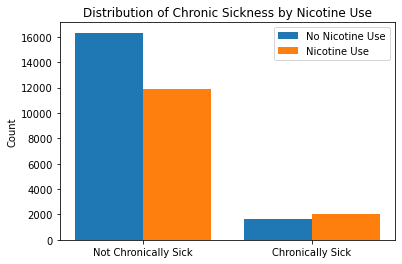

In [79]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [81]:
# Your code here (create additional cells as needed)

""" 
Between two categories, we use the chi square test of independence

Ho: There is no association between the two variables, and any observed difference in the frequencies is due to chance. 
Ha: There is a significant association between the two variables.
""" 

' \nBetween two categories, we use the chi square test of independence\n\nHo: There is no association between the two variables, and any observed difference in the frequencies is due to chance. \nHa: There is a significant association between the two variables.\n'

In [84]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square test results:')
print(f'  Test statistic: {chi2:.2f}')
print(f'  p-value: {pval:.5f}')

Chi-square test results:
  Test statistic: 228.23
  p-value: 0.00000


In [86]:
""" 
The p-value 0 is less that alpha 0.05, we reject the null hypothesis.
There is evidence of an association between 'NICOTINE_USE' and 'CHRONIC'. 

""" 

" \nThe p-value 0 is less that alpha 0.05, we reject the null hypothesis.\nThere is evidence of an association between 'NICOTINE_USE' and 'CHRONIC'. \n\n"

## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [ ]:
# Your code here (create additional cells as needed)

## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.